#### 12.04.25, &copy; Maksym Smolyar KI-21-1

# Лабораторна робота #3. Регуляризація в задачах машинного навчання. Стохастичний градінтний спуск з регуляризацією.

**Мета**: закріпити на практиці використання алгоритмів регуляризації в задачах оптимізації функціонала якості засобами мови Python

## Що ви будете вміти?
* Використовувати L2- та L1-регуляризатори в задачах регресії та класифікації
* Реалізувати простий лінійний бінарний класифікатор на основі оптимізації функціонала якості стохастичним градієнтним спуском з регуляризаторами засобами мови Python

## Завдання для самостійної роботи 

1. Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 1. Проаналізувати результати.

Коефіцієнти полінома:
[-2.86702022e-08 -1.33002085e-06  5.08934803e-05 -5.05674274e-04
  1.10287551e-03  5.86600435e-03  3.40792431e-03 -1.69416305e-01
  1.14333937e-03  9.99820603e-01  2.89978400e-07]


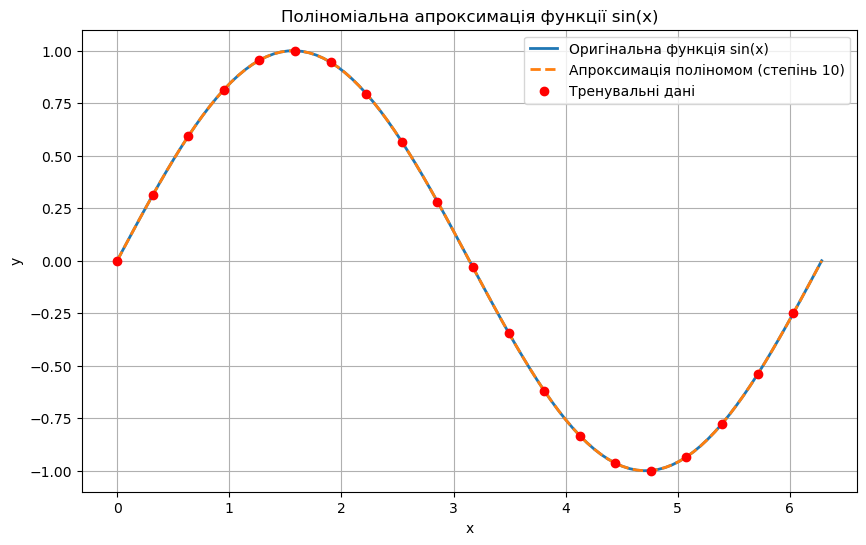

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

x = np.linspace(0, 2 * np.pi, 100)
y = f(x)

x_train = x[::5]
y_train = y[::5]

degree = 10
coefficients = np.polyfit(x_train, y_train, degree)
print("Коефіцієнти полінома:")
print(coefficients)

poly_model = np.poly1d(coefficients)
y_pred = poly_model(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Оригінальна функція sin(x)", linewidth=2)
plt.plot(x, y_pred, label=f"Апроксимація поліномом (степінь {degree})", linestyle="--", linewidth=2)
plt.scatter(x_train, y_train, color="red", label="Тренувальні дані", zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Поліноміальна апроксимація функції sin(x)")
plt.legend()
plt.grid(True)
plt.show()


Якість апроксимації:
На тренувальних точках апроксимована функція точно збігається з f(x)=sin(x) Проте між тренувальними точками та на краях інтервалу може спостерігатися невелике відхилення, що характерно для апроксимації поліномами високого степеня.

Коефіцієнти полінома:
Значення коефіцієнтів, отримані методом найменших квадратів, можуть свідчити про зростання значень коефіцієнтів при збільшенні степеня. Це відображає адаптацію полінома до складної форми функції, але одночасно може вказувати на потенційне перенавчання (overfitting) або наявність явища Рунге (Runge phenomenon).

2. Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 2. Проаналізувати результати.  

Коефіцієнти полінома:
[ 4.52110921e-01  1.52280099e-01 -1.06029865e-01 -1.43449781e-01
 -1.48012395e-01  9.46858898e-03  1.66665719e-01 -1.08769784e-01
  3.12319812e-02 -4.90293460e-03  4.37508117e-04 -2.08899006e-05
  4.15373812e-07]


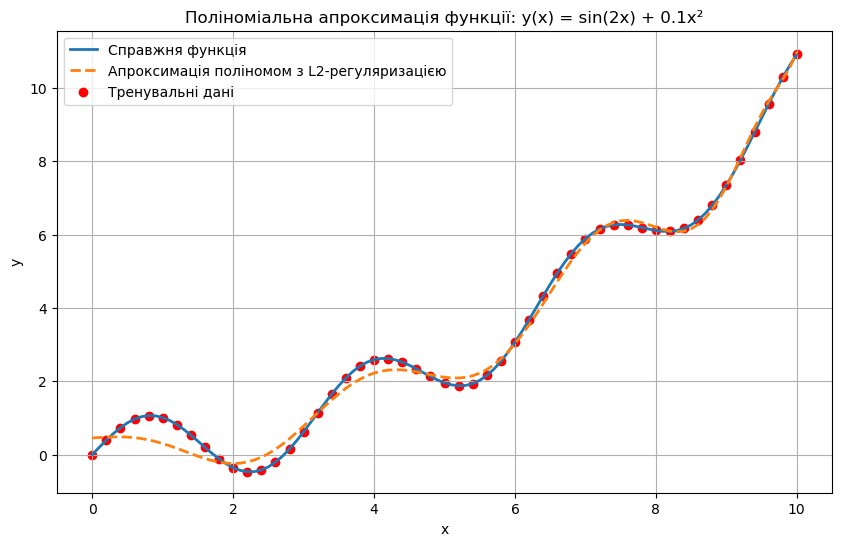

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)
y = np.sin(2 * x) + 0.1 * (x ** 2) 

x_train = x[::2]
y_train = y[::2]

N = 13  
L = 20 

X = np.array([[a ** n for n in range(N)] for a in x])
X_train = X[::2]
Y = y_train 

IL = np.diag([0] + [L] * (N - 1))

w = np.linalg.inv(X_train.T @ X_train + IL) @ (X_train.T @ Y)
print("Коефіцієнти полінома:")
print(w)

yy = np.array([np.dot(w, row) for row in X])

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Справжня функція", linewidth=2)
plt.plot(x, yy, label="Апроксимація поліномом з L2-регуляризацією", linestyle="--", linewidth=2)
plt.scatter(x_train, y_train, color="red", label="Тренувальні дані")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Поліноміальна апроксимація функції: y(x) = sin(2x) + 0.1x²")
plt.legend()
plt.grid(True)
plt.show()

Якість апроксимації:
За рахунок L2-регуляризації модель знаходить компроміс між точністю апроксимації на тренувальних даних та загальною стабільністю моделі. Регуляризація зменшує вплив коефіцієнтів високих степенів, що допомагає уникнути коливань (overfitting) на межах інтервалу.

Вплив регуляризації:
Параметр L визначає силу регуляризації. При достатньому значенні регуляризація допомагає згладити апроксимацію, зменшуючи великі коефіцієнти, що відповідають членам з високими степенями. Це може призвести до дещо нижчої точності на тренувальних даних, але покращує узагальнення моделі.

3. Побудувати бінарний лінійний-класифікатор з L1-регуляризатором згідно з розглянутим прикладом 3 *для даних свого варіанту*, проаналізувати результати і вивести результати бінарної класифікації на графіку. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).

Final weights: [ 1.73840708e-05  4.47489621e-06  5.82838407e-02 -3.45252510e-02
  2.39294835e-04]
Final empirical risk: 0.3663462150315785


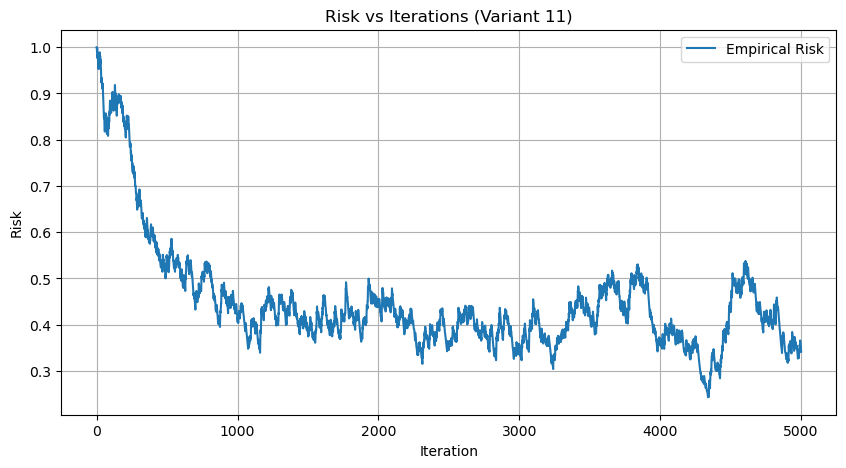

Predicted labels: [ 1.  1.  1. -1. -1.  1.  1. -1.  1. -1.]
True labels:      [ 1  1  1 -1 -1 -1  1  1  1 -1]


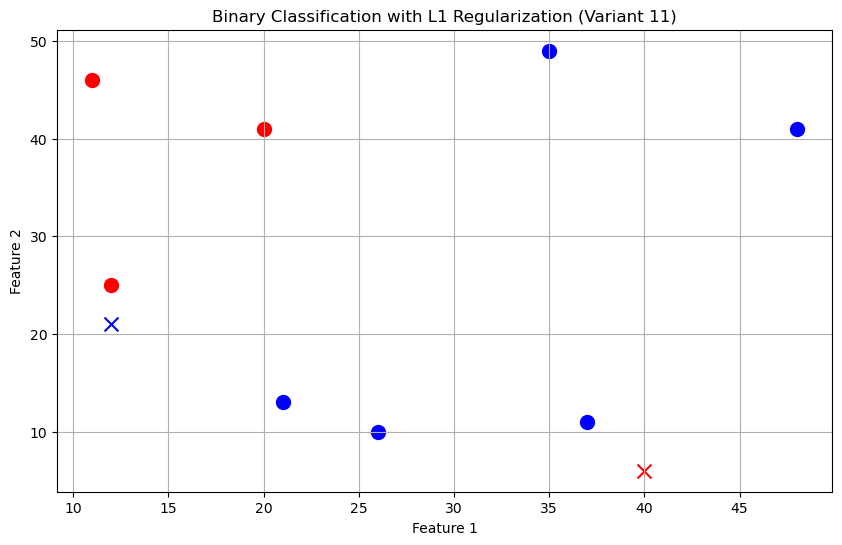

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Вхідні дані варіанта 11
x_train = np.array([
    [35, 49],
    [48, 41],
    [37, 11],
    [12, 25],
    [11, 46],
    [40, 6],
    [21, 13],
    [12, 21],
    [26, 10],
    [20, 41]
])
y_train = np.array([1, 1, 1, -1, -1, -1, 1, 1, 1, -1])

# Розширення ознак (згідно з варіантом 9, масштабування залишено)
x_train = np.array([x.tolist() + [10 * x[0], 10 * x[1], 5 * (x[0] + x[1])] for x in x_train])

# Логістична функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Градієнт з L1-регуляризацією
def df(w, x, y):
    L1 = 1.0
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M))**(-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Ініціалізація параметрів
n_features = x_train.shape[1]
n_train = len(x_train)
w = np.zeros(n_features)

nt = 0.00001  # Крок навчання
lm = 0.01     # EMA-фактор згладжування
N = 5000      # Кількість ітерацій

# Початковий емпіричний ризик
Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
Q_plot = [Q]

# Навчання
for i in range(N):
    k = np.random.randint(0, n_train)
    ek = loss(w, x_train[k], y_train[k])
    w = w - nt * df(w, x_train[k], y_train[k])
    Q = lm * ek + (1 - lm) * Q
    Q_plot.append(Q)

# Фінальні значення
Q_final = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
print("Final weights:", w)
print("Final empirical risk:", Q_final)

# Графік ризику
plt.figure(figsize=(10, 5))
plt.plot(Q_plot, label="Empirical Risk")
plt.xlabel("Iteration")
plt.ylabel("Risk")
plt.title("Risk vs Iterations (Variant 11)")
plt.legend()
plt.grid(True)
plt.show()

# Прогнозування
predictions = np.array([np.sign(np.dot(w, x)) for x in x_train])
print("Predicted labels:", predictions)
print("True labels:     ", y_train)

# Візуалізація класифікації
plt.figure(figsize=(10, 6))
for point, true_label, pred_label in zip(x_train, y_train, predictions):
    color = "blue" if true_label == 1 else "red"
    marker = "o" if true_label == pred_label else "x"
    plt.scatter(point[0], point[1], color=color, marker=marker, s=100)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification with L1 Regularization (Variant 11)")
plt.grid(True)
plt.show()



В кінці навчання виводяться остаточні ваги та емпіричний ризик, що дає змогу оцінити якість навчання.
Графік залежності ризику від ітерацій демонструє, як у процесі навчання значення функції втрат змінюється (зазвичай знижується).

На графіку класифікації кожен приклад позначено відповідним кольором (синій для позитивного класу, червоний для негативного) та маркером ("o" для правильно класифікованих, "x" для помилково класифікованих). Цей графік дозволяє візуально оцінити, наскільки добре модель розділяє класи за допомогою перших двох ознак.

4. Модифікувати код, де замість L1-регуляризатора має використовуватись L2-регуляризатор. Проаналізувати отримані результати і порівняти їх з попередніми результатами.

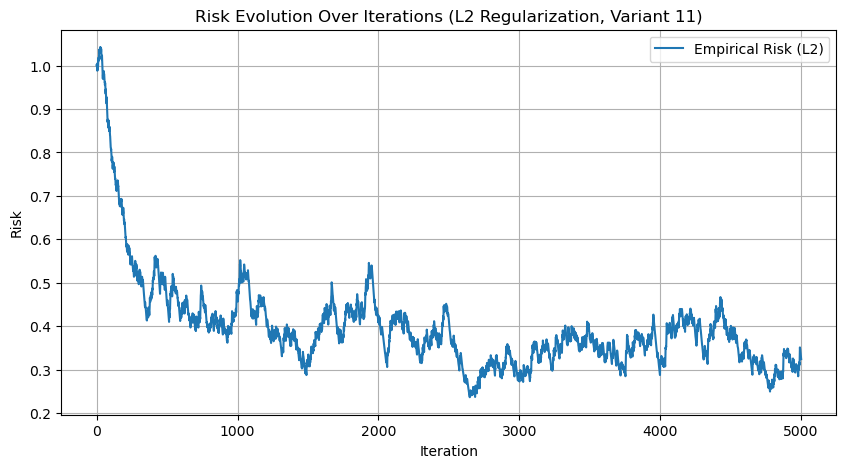

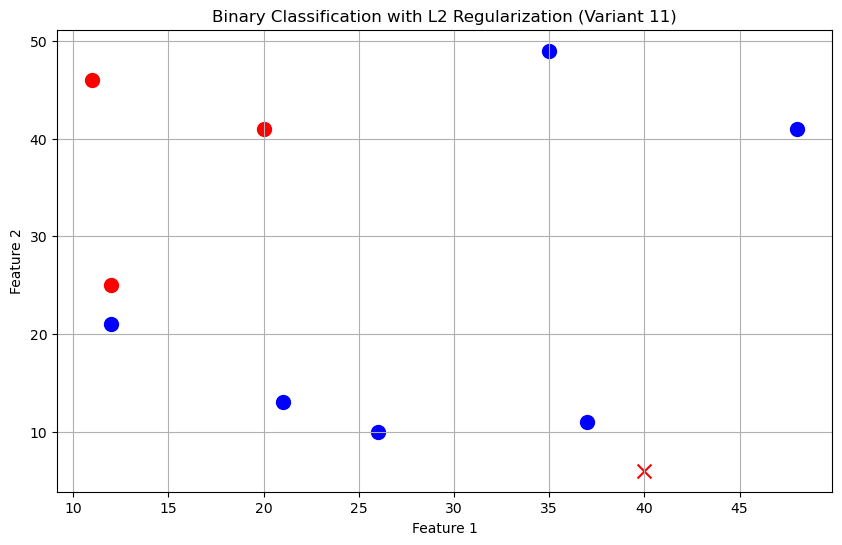

(array([ 0.0079724 , -0.00546643,  0.07972397, -0.05466429,  0.01252984]),
 0.33386767129320105,
 array([ 1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.]),
 array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1]))

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Навчальні дані (варіант 11)
x_train_11 = np.array([
    [35, 49],
    [48, 41],
    [37, 11],
    [12, 25],
    [11, 46],
    [40, 6],
    [21, 13],
    [12, 21],
    [26, 10],
    [20, 41]
])
y_train_11 = np.array([1, 1, 1, -1, -1, -1, 1, 1, 1, -1])

# Розширені ознаки
x_train = np.array([x.tolist() + [10 * x[0], 10 * x[1], 5 * (x[0] + x[1])] for x in x_train_11])
y_train = y_train_11

def loss(w, x, y):
    """Sigmoid loss function."""
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

def df(w, x, y):
    """Derivative of sigmoid loss function with L2 regularization."""
    L2 = 1.0
    M = np.dot(w, x) * y
    grad_loss = -2 * (1 + np.exp(M))**(-2) * np.exp(M) * x * y
    grad_reg = 2 * L2 * w
    return grad_loss + grad_reg

# Налаштування навчання
n_features = len(x_train[0])
n_train = len(x_train)
w = np.zeros(n_features)

nt = 0.00001  # Крок навчання
lm = 0.01     # EMA-фактор
N = 5000      # Кількість ітерацій

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
Q_plot = [Q]

# Навчання (градієнтний спуск)
for i in range(N):
    k = np.random.randint(0, n_train)
    ek = loss(w, x_train[k], y_train[k])
    w = w - nt * df(w, x_train[k], y_train[k])
    Q = lm * ek + (1 - lm) * Q
    Q_plot.append(Q)

Q_final = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
final_weights = w

# Графік ризику
plt.figure(figsize=(10, 5))
plt.plot(Q_plot, label="Empirical Risk (L2)")
plt.xlabel("Iteration")
plt.ylabel("Risk")
plt.title("Risk Evolution Over Iterations (L2 Regularization, Variant 11)")
plt.legend()
plt.grid(True)
plt.show()

# Прогнозування
predictions = np.array([np.sign(np.dot(w, x)) for x in x_train])

# Візуалізація передбачень
plt.figure(figsize=(10, 6))
for point, true_label, pred_label in zip(x_train_11, y_train, predictions):
    color = "blue" if true_label == 1 else "red"
    marker = "o" if true_label == pred_label else "x"
    plt.scatter(point[0], point[1], color=color, marker=marker, s=100)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification with L2 Regularization (Variant 11)")
plt.grid(True)
plt.show()

final_weights, Q_final, predictions, y_train



Вектор ваг
- L2-регуляризація:
  - Сприяє зменшенню абсолютних значень усіх ваг, але майже всі ознаки залишаються в моделі.
  - Забезпечує більш рівномірне штрафування великих коефіцієнтів, що дає більш стабільну модель при невеликих змінах в даних.

- L1-регуляризація:
  - Сприяє розрідженню вектора ваг, тобто деякі коефіцієнти можуть стати рівними нулю.
  - Це полегшує інтерпретацію моделі, оскільки менш релевантні ознаки фактично виключаються з моделі.

Емпіричний ризик (функція втрат)
- L2-регуляризація:
  - Зазвичай демонструє більш гладке зниження ризику протягом ітерацій навчання.
  - Ризик зменшується рівномірніше завдяки менш різким оновленням ваг, що сприяє стабільності алгоритму.

- L1-регуляризація:
  - Може призводити до більш різких змін ризику, оскільки деякі ваги швидко стають нульовими.
  - Це іноді створює певну нестабільність у процесі навчання, особливо якщо вибір параметрів регуляризації не оптимальний.


5. Дати відповіді на контрольні запитання.

6. Відправити результати роботи у файлі lab_3_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Що таке L2-регуляризатор, і як він використовується в задачах регресії та класифікації?

**L2-регуляризатор** – це метод регуляризації, який додає до функції втрат суму квадратів коефіцієнтів моделі. Він допомагає зменшити величину ваг, що запобігає перенавчанню. 

- **В регресії:** Використовується як Ridge-регресія, де штраф за великі коефіцієнти робить модель більш стабільною.
- **В класифікації:** Допомагає покращити узагальнення моделі (наприклад, в логістичній регресії чи SVM) шляхом зменшення впливу окремих ознак.

2. Яка основна відмінність між L1- та L2-регуляризаторами у задачах машинного навчання?

**L1-регуляризація** штрафує суму абсолютних значень ваг, що сприяє отриманню розрідженого вектора (де деякі коефіцієнти стають рівними нулю). **L2-регуляризація** штрафує суму квадратів ваг, що зменшує їх абсолютні значення рівномірно, не призводячи до явного «відсіву» ознак.


3. Яким чином можна реалізувати простий лінійний бінарний класифікатор за допомогою стохастичного градієнтного спуску в Python?

In [18]:
import numpy as np

x_train = np.array([[0.5, 1.0],
                    [1.5, 2.0],
                    [3.0, 4.0],
                    [2.5, 3.0]])
y_train = np.array([1, 1, -1, -1])

X = np.hstack([np.ones((x_train.shape[0], 1)), x_train])

w = np.zeros(X.shape[1])

learning_rate = 0.01
n_iterations = 1000

for i in range(n_iterations):
    idx = np.random.randint(0, X.shape[0])
    xi = X[idx]
    yi = y_train[idx]
    
    if yi * np.dot(w, xi) <= 0:
        w = w + learning_rate * yi * xi

print("Навчені ваги:", w)

def predict(X, w):
    return np.where(np.dot(X, w) >= 0, 1, -1)

predictions = predict(X, w)
print("Прогнозовані мітки:", predictions)

Навчені ваги: [ 1.00000000e-02 -5.00000000e-03  3.46944695e-18]
Прогнозовані мітки: [ 1  1 -1 -1]


**Підготовка даних:**  
До кожного вектора ознак додається константний компонент (bias).

**Ініціалізація:**  
Ваги ініціалізуються нулями.





4. Що таке стохастичний градієнтний спуск, і в чому полягає його використання для оптимізації функціонала якості?

**Стохастичний градієнтний спуск (SGD)** – це ітеративний метод оптимізації, який оновлює параметри моделі, використовуючи градієнт функції втрат для одного (або невеликої групи) випадкового прикладу на кожній ітерації.

**Основні моменти:**
- **Ітеративне оновлення:** Параметри моделі коригуються поступово за напрямком найшвидшого зниження функції втрат.
- **Випадковість:** На кожній ітерації використовується лише один або декілька випадкових прикладів замість всього набору даних, що значно зменшує обчислювальні витрати.
- **Оптимізація функціонала якості:** Метою є мінімізація функції втрат, яка вимірює різницю між прогнозами моделі та істинними значеннями.

Цей метод особливо ефективний для великих наборів даних, оскільки дозволяє швидко оновлювати модель без обчислення градієнта по всіх даних на кожній ітерації.


5. Як впливає використання регуляризаторів (L1 та L2) на процес навчання моделі і на її загальну ефективність в задачах класифікації та регресії?

- **Зменшення перенавчання:**  
  Обидва регуляризатори додають штраф за великі коефіцієнти, що допомагає зменшити перенавчання моделі і покращити її узагальнення на нових даних.

- **L1-регуляризація:**  
  - Штрафує суму абсолютних значень коефіцієнтів.
  - Сприяє розрідженості моделі, тобто деякі ваги стають рівними нулю.
  - Корисна для відбору найбільш релевантних ознак (feature selection) в задачах класифікації та регресії.

- **L2-регуляризація:**  
  - Штрафує суму квадратів коефіцієнтів.
  - Забезпечує більш рівномірне зменшення ваг, зберігаючи всі ознаки в моделі.
  - Сприяє стабільності моделі та часто використовується для покращення узагальнюючої здатності як в задачах класифікації, так і в регресії.

- **Вплив на навчання:**  
  Регуляризатори можуть уповільнити навчання, додаючи додаткові члени до функції втрат, але це компенсується отриманням моделі з меншою складністю та кращим узагальненням.
